<function matplotlib.pyplot.show>

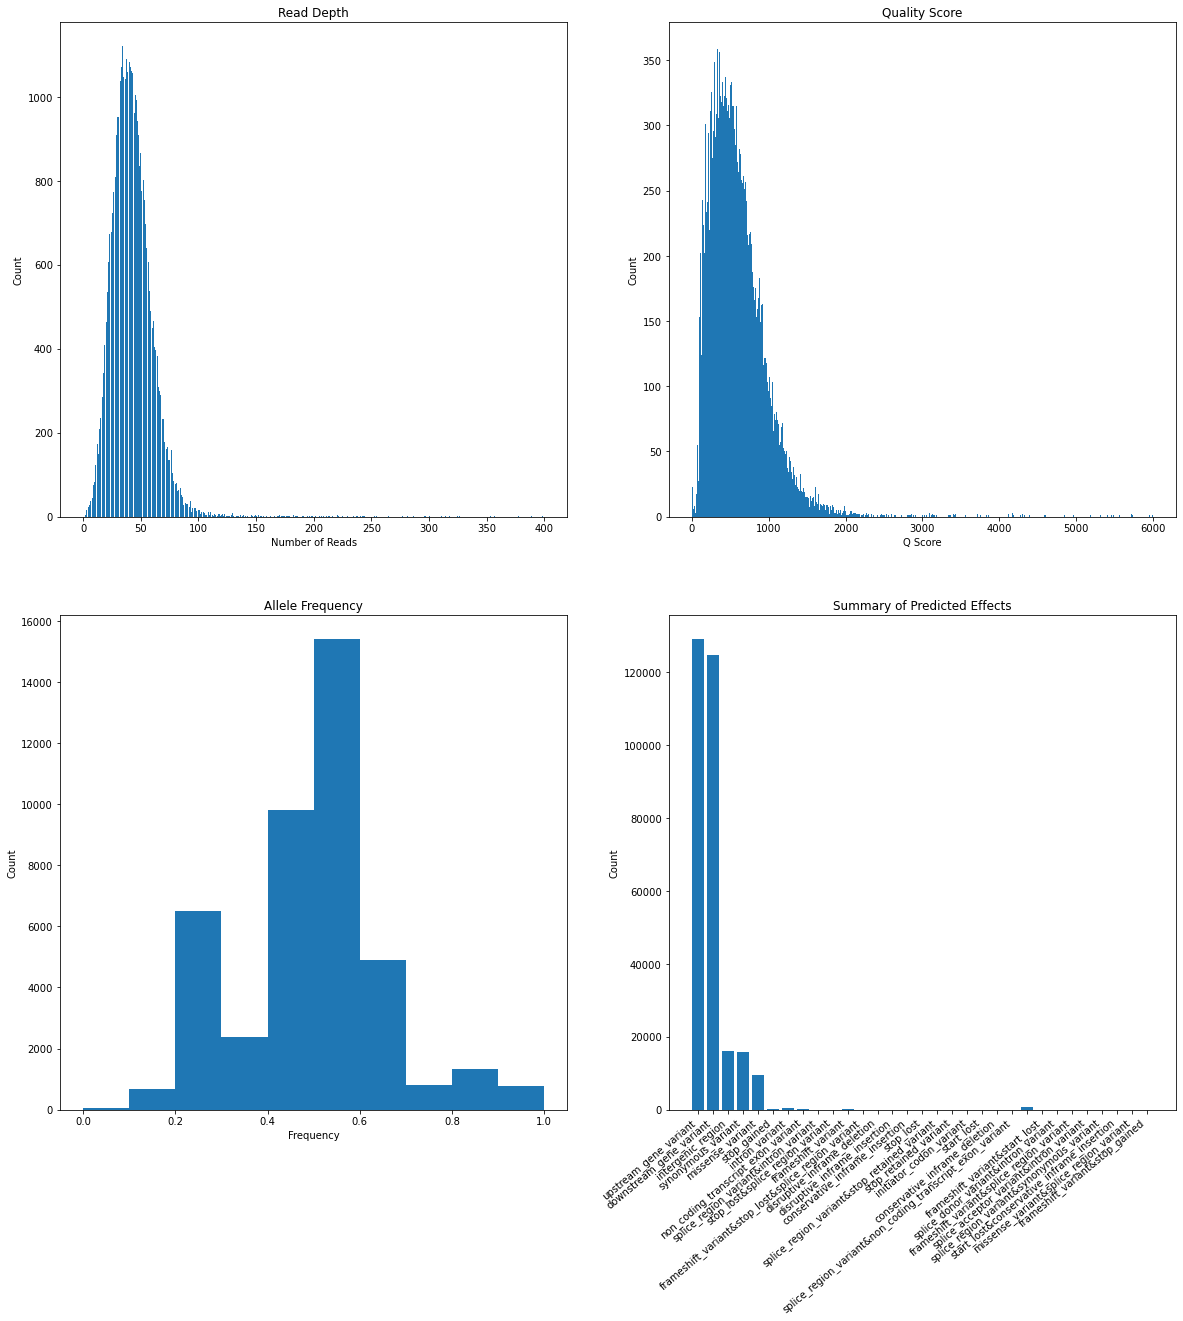

In [7]:
import matplotlib.pyplot as plt

file = open('prediction.vcf', 'r')

dp = []
qa = []
af = []
ANNdict = {}


for line in file:
        
        if '#' not in line:
            linesplit = line.split(';')
            for field in linesplit:
                
                if 'DP=' in field:
                    
                    if 'DPB=' not in field:
                        
                        if ',' not in field:
                            dp.append(float(field[3:]))
                    
                        else: 
                            dp_split = field.split(',')
                            for x in dp_split:
                                if 'DP=' in x:
                                    dp.append(float(x[3:]))
                                else:
                                    dp.append(float(x))
                        
                        
                if 'QA=' in field:
                    
                    if 'PQA=' not in field:
                        
                        if ',' not in field:
                            qa.append(float(field[3:]))
                            
                        else:
                            qa_split = field.split(',')
                            for y in qa_split:
                                if 'QA=' in y:
                                    qa.append(float(y[3:]))
                                else:
                                    qa.append(float(y))
                        
                if 'AF=' in field:
                    if 'SAF=' not in field:
                        
                        if ',' not in field:
                            af.append(float(field[3:]))
                            
                        else:
                            af_split = field.split(',')
                            for z in af_split:
                                if 'AF=' in z:
                                    af.append(float(z[3:]))
                                else:
                                    af.append(float(z))
                        

                if 'ANN=' in field:
                    field_split = field.split(',')
                    for variant in field_split:
                        if '|' in variant:
                            start = variant.index('|')
                            end = variant[start+1:].index('|')
                            effect = variant[start+1:end+start+1]
                            ANNdict.setdefault(effect, 0)
                            ANNdict[effect]+=1
                   
        
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
keys=ANNdict.keys()
values=ANNdict.values()

ax[1][1].bar(keys, values)
ax[1][1].set_title("Summary of Predicted Effects")
ax[1][1].set_ylabel("Count")

ax[0][0].hist(dp, range=(0, 400),bins=500)
ax[0][0].set_title("Read Depth")
ax[0][0].set_ylabel("Count")
ax[0][0].set_xlabel("Number of Reads")

ax[1][0].hist(af)
ax[1][0].set_title("Allele Frequency")
ax[1][0].set_ylabel("Count")
ax[1][0].set_xlabel("Frequency")

ax[0][1].hist(qa, range=(0,6000), bins =1000)
ax[0][1].set_title("Quality Score")
ax[0][1].set_ylabel("Count")
ax[0][1].set_xlabel("Q Score")

plt.xticks(rotation = 40, ha='right')
plt.show


    
